In [1]:
# Given values
sensitivity = 0.995  # P(Test=Pos | Infect=True)
specificity = 0.995  # P(Test=Neg | Infect=False)
p_infected = 0.05    # P(Infect=True)
p_not_infected = 1 - p_infected  # P(Infect=False)

p_test_positive = (sensitivity * p_infected) + ((1 - specificity) * p_not_infected)

# Applying Bayes' theorem
# P(Infect=True | Test=Pos) = P(Test=Pos | Infect=True) * P(Infect=True) / P(Test=Pos)
p_infected_given_test_positive = (sensitivity * p_infected) / p_test_positive
print(p_infected_given_test_positive)

0.9128440366972477


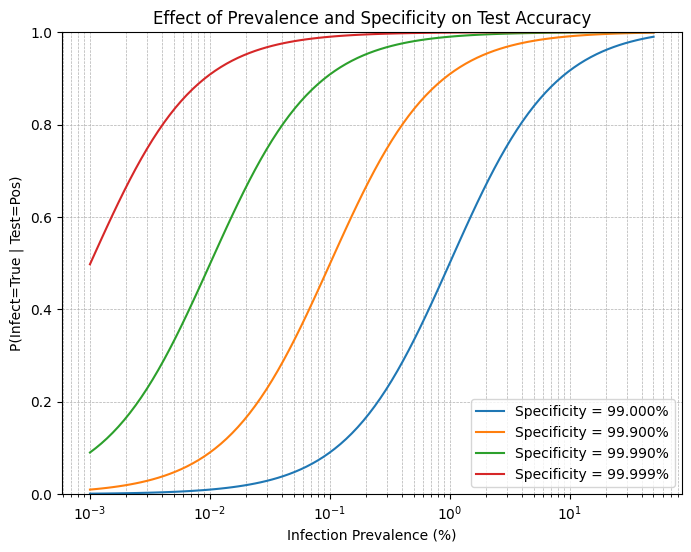

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed sensitivity
sensitivity = 0.99  

# Specificity values to analyze
specificity_values = [0.99, 0.999, 0.9999, 0.99999]

# Prevalence values from 0.001% to 50%
prevalence_values = np.logspace(-5, -0.3, 100)  # 10^(-5) to 10^(-0.3), in log10 scale

# Function to compute P(Infect=True | Test=Pos) using Bayes' theorem
def compute_posterior(prevalence, sensitivity, specificity):
    p_infected = prevalence
    p_not_infected = 1 - prevalence
    p_test_positive = (sensitivity * p_infected) + ((1 - specificity) * p_not_infected)
    return (sensitivity * p_infected) / p_test_positive

# Plot
plt.figure(figsize=(8, 6))

for specificity in specificity_values:
    posterior_probs = [compute_posterior(p, sensitivity, specificity) for p in prevalence_values]
    plt.plot(prevalence_values * 100, posterior_probs, label=f"Specificity = {specificity * 100:.3f}%")

plt.xscale("log")
plt.xlabel("Infection Prevalence (%)")
plt.ylabel("P(Infect=True | Test=Pos)")
plt.title("Effect of Prevalence and Specificity on Test Accuracy")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.ylim(0, 1)
plt.show()

## Integer check
Total people tested: 100,000 <br>
prevalence = 0.001, i.e., 100 people are truely affected. <br>
sensitivity = 0.99, i.e., #(Test=Pos | Infect=True) = 0.99*100 = 99 <br>
specificity = 0.99, i.e., #(Test=Neg | Infect=False)= 0.99*(100,000-100) = 98901 <br>
#(Test=Pos | Infect=False) = 0.01*(100,000-100) = 999 <br>
#(Test=Pos) = 99 + 999 = 1098 <br>
P(infect=true|test=pos) = # indeed infected in tested positve / # tested positive = 99 / 1098 ~= 9.02%